In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to C:\Users\Sakthi
[nltk_data]     Murugan V\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


True

In [2]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the movie reviews dataset
reviews = [(movie_reviews.raw(fileid), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    
    # Removing punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    porter = PorterStemmer()
    tokens = [porter.stem(token) for token in tokens]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Example of preprocessing a single review
sample_review = reviews[0][0]  # Selecting the first review
preprocessed_review = preprocess_text(sample_review)
print("Original Review:")
print(sample_review[:200])  # Print the first 200 characters of the original review
print("\nPreprocessed Review:")
print(preprocessed_review)


[nltk_data] Downloading package punkt to C:\Users\Sakthi Murugan
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Sakthi Murugan
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Original Review:
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w

Preprocessed Review:
plot two teen coupl go church parti drink drive get accid one guy die girlfriend continu see life nightmar 's deal watch movi `` sorta `` find critiqu mind-fuck movi teen gener touch cool idea present bad packag make review even harder one write sinc gener applaud film attempt break mold mess head lost highway memento good bad way make type film folk n't snag one correctli seem taken pretti neat concept execut terribl problem movi well main problem 's simpli jumbl start `` normal `` downshift `` fantasi `` world audienc member idea 's go dream charact come back dead other look like dead strang apparit disappear looooot chase scene ton weird thing happen simpli explain person n't mind tri unravel film everi give clue get kind fed film 's biggest probl

In [3]:
# Preprocess the entire dataset
preprocessed_reviews = [(preprocess_text(review), label) for review, label in reviews]

# Print the first preprocessed review as an example
print("Preprocessed Review:")
print(preprocessed_reviews[0][0])

# Check the length of the preprocessed dataset
print("\nNumber of Preprocessed Reviews:", len(preprocessed_reviews))


Preprocessed Review:
plot two teen coupl go church parti drink drive get accid one guy die girlfriend continu see life nightmar 's deal watch movi `` sorta `` find critiqu mind-fuck movi teen gener touch cool idea present bad packag make review even harder one write sinc gener applaud film attempt break mold mess head lost highway memento good bad way make type film folk n't snag one correctli seem taken pretti neat concept execut terribl problem movi well main problem 's simpli jumbl start `` normal `` downshift `` fantasi `` world audienc member idea 's go dream charact come back dead other look like dead strang apparit disappear looooot chase scene ton weird thing happen simpli explain person n't mind tri unravel film everi give clue get kind fed film 's biggest problem 's obvious got big secret hide seem want hide complet final five minut make thing entertain thrill even engag meantim realli sad part arrow dig flick like actual figur half-way point strang start make littl bit sens 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separate the preprocessed text and labels
X = [review for review, _ in preprocessed_reviews]
y = [label for _, label in preprocessed_reviews]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features to 5000

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check the shape of the transformed data
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_train_tfidf: (1600, 5000)
Shape of X_test_tfidf: (400, 5000)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression_model.fit(X_train_tfidf, y_train)

# Predictions on the testing set
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8075

Classification Report:
              precision    recall  f1-score   support

         neg       0.81      0.80      0.81       199
         pos       0.81      0.81      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [6]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 500, 1000],   # Maximum number of iterations
}

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 100, 'max_iter': 100}

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

         neg       0.84      0.82      0.83       199
         pos       0.82      0.84      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [7]:
from joblib import dump

# Save the best model to a file
model_filename = 'sentiment_analysis_model.joblib'
dump(best_model, model_filename)

print("Model saved to", model_filename)


Model saved to sentiment_analysis_model.joblib


In [8]:
from joblib import load

# Load the model from the file
loaded_model = load('sentiment_analysis_model.joblib')

# Make predictions using the loaded model
new_text = ["This movie was fantastic! Highly recommended."]
predicted_sentiment = loaded_model.predict(tfidf_vectorizer.transform(new_text))

print("Predicted sentiment:", predicted_sentiment)


Predicted sentiment: ['neg']


In [9]:
# Find misclassified examples
misclassified_indices = [i for i, (true_label, predicted_label) in enumerate(zip(y_test, y_pred)) if true_label != predicted_label]

# Print a few misclassified examples
print("Misclassified Examples:")
for idx in misclassified_indices[:5]:
    print("True Label:", y_test[idx])
    print("Predicted Label:", y_pred[idx])
    print("Review:", X_test[idx][:200])  # Print the first 200 characters of the review
    print()


Misclassified Examples:
True Label: neg
Predicted Label: pos
Review: `` 44 calib killer struck `` star john leguizamo mira sorvino adrian brodi jennif esposito michael rispoli bebe neuwirth rate r summer sam rememb wast spike lee 's abil lee great filmmak often exhibit

True Label: neg
Predicted Label: pos
Review: synopsi maniac craze virul microphag slaughter twenti peopl includ street gang heavily-arm troop small knife even handgun howev ca n't take two cop despit shot one total seven time comment notabl aspe

True Label: pos
Predicted Label: neg
Review: muppet movi first best movi among ever-grow list muppet movi muppet movi tell stori hero kermit frog came star delight movi age muppet movi burst cameo appear countless hollywood star 80 's today mupp

True Label: pos
Predicted Label: neg
Review: plot human space astronaut accident fall upon planet rule ape taken prison along human tri best escap simian captor oh yeah mention ape talk kewl critiqu despit film look like `` tim burton 

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400, 500]
}

# Initialize logistic regression model
logistic_regression_model = LogisticRegression()

# Initialize grid search cross-validation
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate model with best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 100, 'max_iter': 100}
Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

         neg       0.84      0.82      0.83       199
         pos       0.82      0.84      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



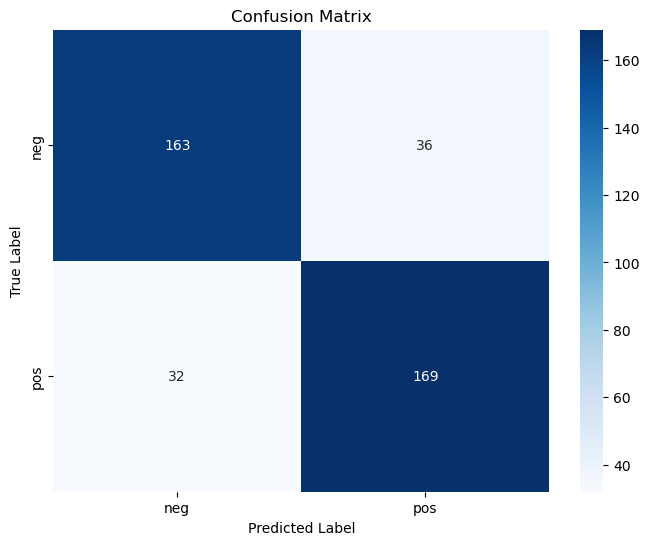

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["neg", "pos"], yticklabels=["neg", "pos"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
